In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('../dataset.csv')
df = df.dropna()
df = df.drop(columns=['Row ID', 'Order ID'])


C:\Users\Moeed\AppData\Local\Temp\ipykernel_8736\2206652661.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../dataset.csv')


In [66]:
total_profits = df.groupby('Customer ID')['Profit'].sum().reset_index()
total_profits = total_profits.sort_values(by='Profit', ascending=False)
print(total_profits)


    Customer ID      Profit
752    TC-20980  26981.6921
632    RB-19360  20928.2877
680    SC-20095  17364.9180
328    HL-15040  16867.2876
6      AB-10105  16191.7564
..          ...         ...
323    HG-14965  -8359.0515
722    SR-20425 -10001.7432
468    LF-17185 -10605.7185
311    GT-14635 -12317.1063
181    CS-12505 -19861.8345

[804 rows x 2 columns]


In [67]:
df_with_discount = df[df['Discount'] != 0]
df_without_discount = df[df['Discount'] == 0]

total_profits_with_discount = df_with_discount.groupby('Customer ID')['Profit'].sum().reset_index()
total_profits_with_discount.columns = ['CustomerID', 'TotalProfitWithDiscount']

total_profits_without_discount = df_without_discount.groupby('Customer ID')['Profit'].sum().reset_index()
total_profits_without_discount.columns = ['CustomerID', 'TotalProfitWithoutDiscount']

total_profits = pd.merge(total_profits_with_discount, total_profits_without_discount, on='CustomerID', how='outer')

total_profits.fillna(0, inplace=True)

print(total_profits)


    CustomerID  TotalProfitWithDiscount  TotalProfitWithoutDiscount
0     AA-10315               -1483.5423                    401.9044
1     AA-10375                  97.5318                    803.6436
2     AA-10480                  16.3296                   1291.1526
3     AA-10645                 617.0985                   2395.6252
4     AB-10015                   8.8659                    379.1736
..         ...                      ...                         ...
799   XP-21865                 385.9044                   1611.6867
800   YC-21895                1281.8001                   2642.1519
801   YS-21880                2718.4689                   2870.5878
802   ZC-21910               -5922.8603                   3134.1154
803   ZD-21925                 249.6945                    497.6976

[804 rows x 3 columns]


In [68]:
df_with_discount = df[df['Discount'] != 0]
df_without_discount = df[df['Discount'] == 0]

total_profits_with_discount = df_with_discount.groupby('Product ID')['Profit'].sum().reset_index()
total_profits_with_discount.columns = ['ProductID', 'TotalProfitWithDiscount']

total_profits_without_discount = df_without_discount.groupby('Product ID')['Profit'].sum().reset_index()
total_profits_without_discount.columns = ['ProductID', 'TotalProfitWithoutDiscount']

total_profits = pd.merge(total_profits_with_discount, total_profits_without_discount, on='ProductID', how='outer')

total_profits.fillna(0, inplace=True)

print(total_profits)


            ProductID  TotalProfitWithDiscount  TotalProfitWithoutDiscount
0     FUR-BO-10000112                -353.6460                      0.0000
1     FUR-BO-10000330                 -33.8744                    101.6232
2     FUR-BO-10000362                 -46.1646                    943.8096
3     FUR-BO-10000468                -585.8748                    217.6384
4     FUR-BO-10000711                   0.0000                    689.9256
...               ...                      ...                         ...
1857  TEC-PH-10004912                 118.6920                    143.4195
1858  TEC-PH-10004922                 140.6790                    327.7875
1859  TEC-PH-10004924                   4.1384                     35.9154
1860  TEC-PH-10004959                  45.2205                    100.4900
1861  TEC-PH-10004977                 938.7921                   1534.6017

[1862 rows x 3 columns]


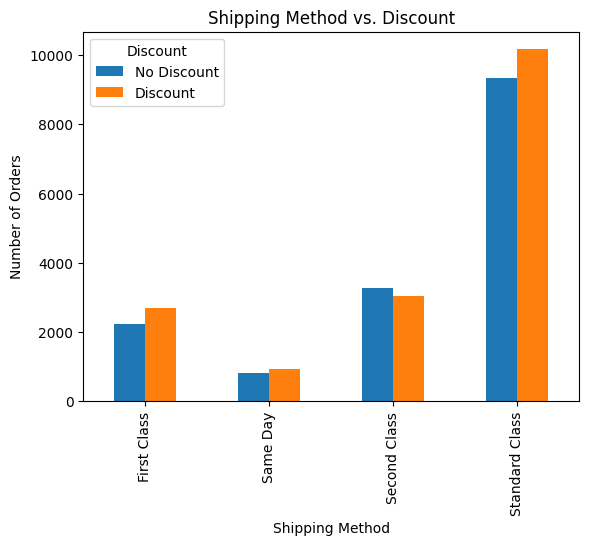

In [69]:
df['DiscountIndicator'] = df['Discount'].apply(lambda x: 1 if x > 0 else 0)

contingency_table = pd.crosstab(df['Ship Mode'], df['DiscountIndicator'])

contingency_table.plot(kind='bar', stacked=False)
plt.title('Shipping Method vs. Discount')
plt.xlabel('Shipping Method')
plt.ylabel('Number of Orders')
plt.legend(['No Discount', 'Discount'], title='Discount')
plt.show()

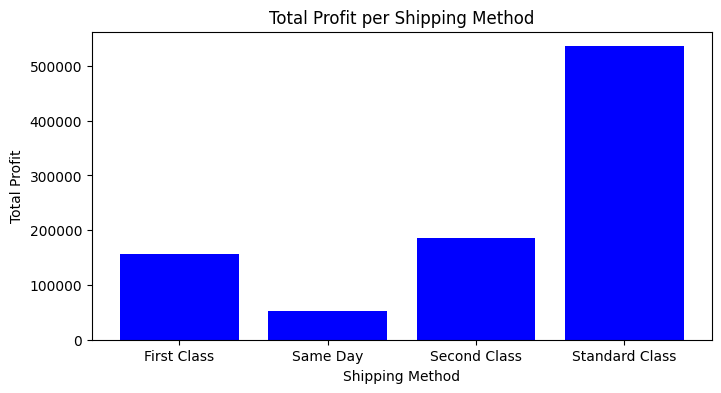

In [77]:
total_profit_per_shipping_method = df.groupby('Ship Mode')['Profit'].sum().reset_index()

plt.figure(figsize=(8, 4))
plt.bar(total_profit_per_shipping_method['Ship Mode'], total_profit_per_shipping_method['Profit'], color='blue')
plt.title('Total Profit per Shipping Method')
plt.xlabel('Shipping Method')
plt.ylabel('Total Profit')
plt.show()